### 1. Analysis and Clean the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

TH = 0.98

warnings.simplefilter("ignore")
np.random.seed(0)
sns.set()

In [3]:
data = pd.read_csv('./data/data.csv', encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [6]:
data_UK = data[data['Country']=='United Kingdom']
data_UK['total_price'] = data_UK['Quantity'] * data_UK['UnitPrice']
data_UK['InvoiceDate'] = pd.to_datetime(data_UK['InvoiceDate'])
#datetime round...지정 단위 시간대로 반올림 해준다!
data_UK['InvoiceDate_15m'] = data_UK['InvoiceDate'].dt.round('15min')
data_UK['InvoiceDate_1h'] = data_UK['InvoiceDate'].dt.round('1h')

In [7]:
data_UK.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,InvoiceDate_15m,InvoiceDate_1h
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:30:00,2010-12-01 08:00:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:30:00,2010-12-01 08:00:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:30:00,2010-12-01 08:00:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:30:00,2010-12-01 08:00:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:30:00,2010-12-01 08:00:00


In [8]:
data_UK.isna().sum()

InvoiceNo               0
StockCode               0
Description          1454
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID         133600
Country                 0
total_price             0
InvoiceDate_15m         0
InvoiceDate_1h          0
dtype: int64

In [9]:
#clip -> 설정한 데이터 최소, 최대 임계점을 넘기는 데이터는 설정한 값으로 대체
#quantile(0~1) -> 데이터 오름차순으로 정렬 후 백분위에 맞는 데이터 찾기
data_UK_clean = data_UK.copy()
data_UK_clean['UnitPrice'] = data_UK_clean['UnitPrice'].clip(
    data_UK_clean['UnitPrice'].quantile(1-TH), data_UK_clean['UnitPrice'].quantile(TH))
data_UK_clean['Quantity'] = data_UK_clean['Quantity'].clip(
    data_UK_clean['Quantity'].quantile(1-TH), data_UK_clean['Quantity'].quantile(TH))
data_UK_clean['total_price'] = data_UK_clean['total_price'].clip(
    data_UK_clean['total_price'].quantile(1-TH), data_UK_clean['total_price'].quantile(TH))

In [10]:
data_UK_clean['UnitPrice'].describe()

count    495478.000000
mean          3.185605
std           3.022310
min           0.290000
25%           1.250000
50%           2.100000
75%           4.130000
max          14.130000
Name: UnitPrice, dtype: float64

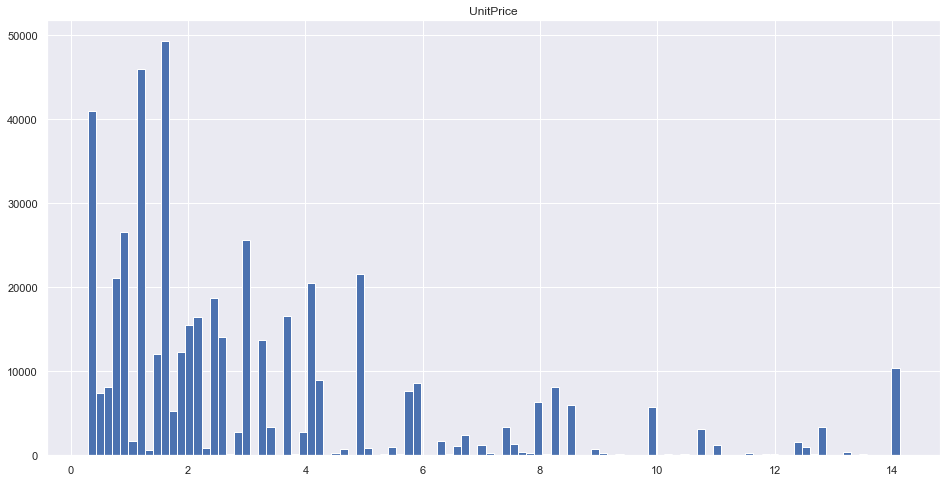

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
data_UK_clean.hist('UnitPrice', ax=ax, bins=100);

In [12]:
data_UK_clean['Quantity'].describe()

count    495478.000000
mean          7.157069
std          10.143284
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max          50.000000
Name: Quantity, dtype: float64

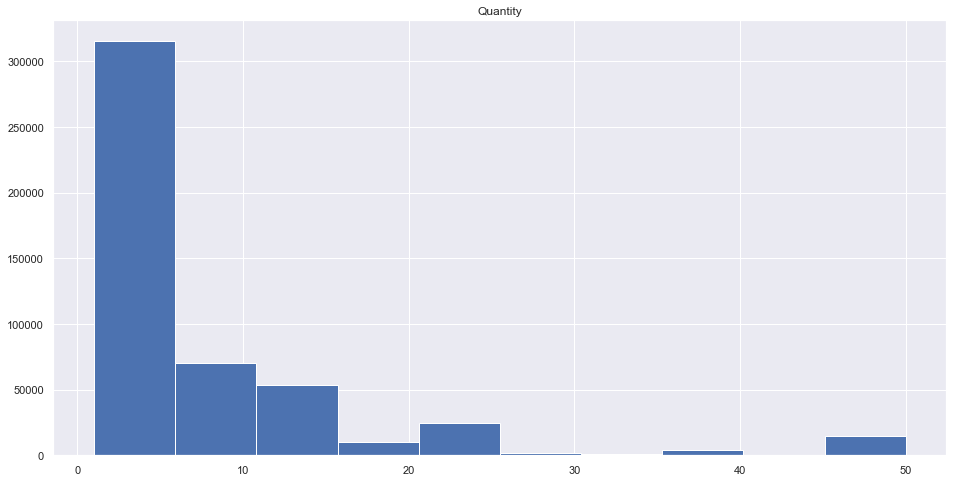

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
data_UK_clean.hist('Quantity', ax=ax);

In [14]:
data_UK_clean['total_price'].describe()

count    495478.000000
mean         14.065425
std          18.785169
min          -0.000000
25%           3.290000
50%           8.290000
75%          16.630000
max         102.000000
Name: total_price, dtype: float64

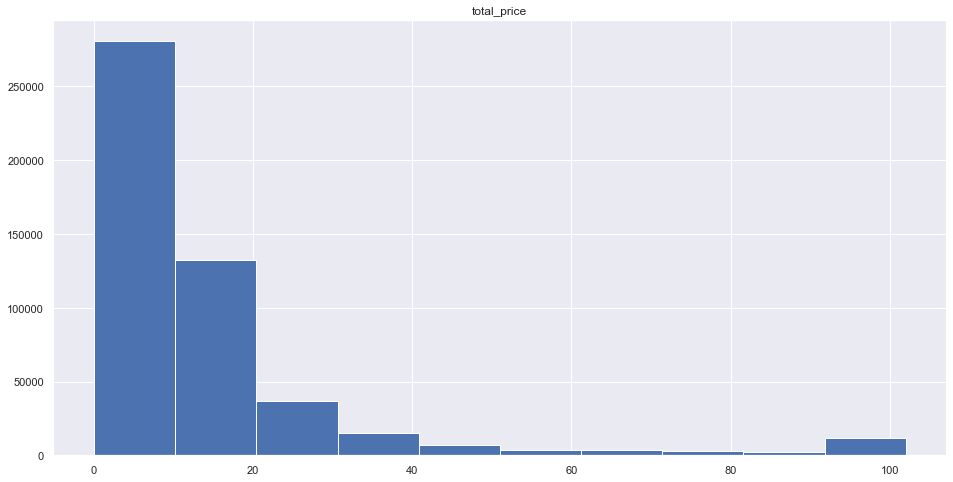

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
data_UK_clean.hist('total_price', ax=ax);

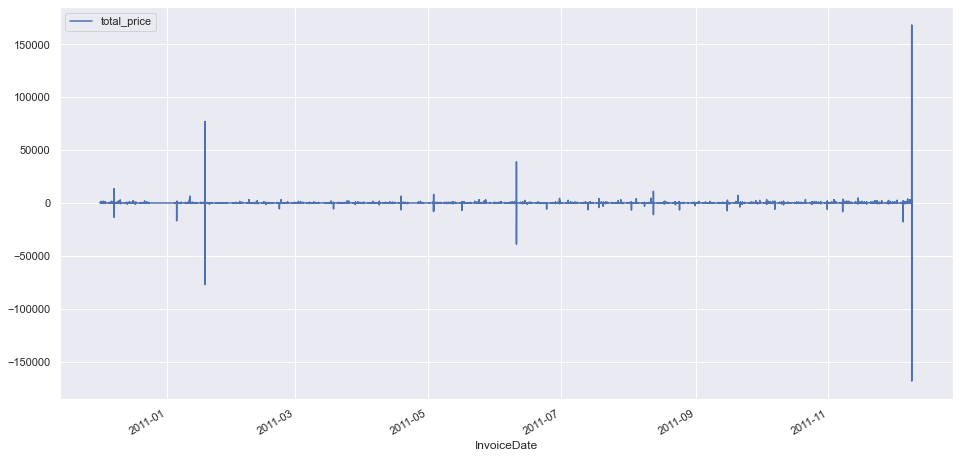

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
data_UK.plot(x='InvoiceDate', y='total_price', ax=ax);

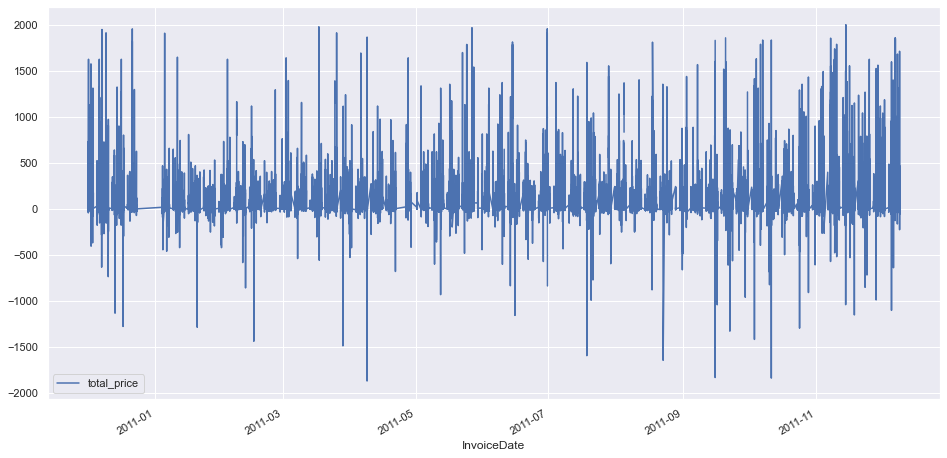

In [17]:
data_UK.loc[(data_UK['total_price'] > 2000) | 
(data_UK['total_price'] < -2000), 'total_price'] = None

fig, ax = plt.subplots(figsize=(16,8))
data_UK.plot(x='InvoiceDate', y='total_price', ax=ax);

In [18]:
data_UK_1h = data_UK.groupby('InvoiceDate_1h').agg({'total_price':'sum'})
data_UK_1h

,total_price
InvoiceDate_1h,
2010-12-01 08:00:00,161.32
2010-12-01 09:00:00,1203.09
2010-12-01 10:00:00,8490.18
2010-12-01 11:00:00,3916.21
2010-12-01 12:00:00,8149.77
...,...
2011-12-09 09:00:00,2028.94
2011-12-09 10:00:00,20260.55
2011-12-09 11:00:00,1304.65


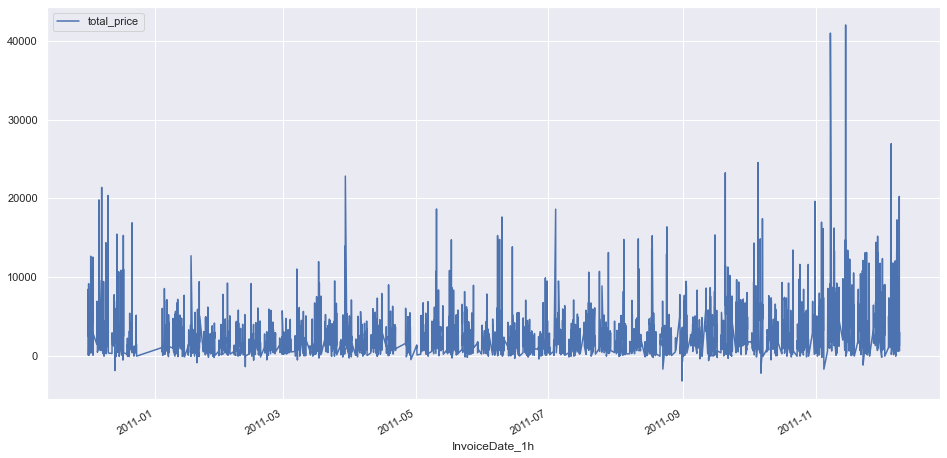

In [19]:
fig, ax = plt.subplots(figsize=(16,8))
data_UK_1h.plot(y='total_price', ax=ax);

In [20]:
#timedelta(hours=1) -> timeStamp형식에서 1시간
t = np.arange(data_UK_1h.index[0], data_UK_1h.index[-1] + timedelta(hours=1), timedelta(hours=1)).astype(datetime)
train_test = pd.DataFrame()
train_test['ds'] = pd.to_datetime(t)
train_test['y'] = 0
train_test['cap'] = 20000
train_test['floor'] = -2000
train_test.iloc[train_test['ds'].isin(data_UK_1h.index), 1] = data_UK_1h['total_price']
train_test.shape

(8958, 4)

In [21]:
train_test.head()

,ds,y,cap,floor
0,2010-12-01 08:00:00,161.32,20000,-2000
1,2010-12-01 09:00:00,1203.09,20000,-2000
2,2010-12-01 10:00:00,8490.18,20000,-2000
3,2010-12-01 11:00:00,3916.21,20000,-2000
4,2010-12-01 12:00:00,8149.77,20000,-2000


### Hyperparameter Tuning with Optuna

In [22]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import optuna

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
test_size = int(train_test.shape[0]/10)
train_df = train_test.iloc[:-test_size, :]
val_df = train_test.iloc[-test_size:int(-test_size/2), :]
test_df = train_test.iloc[int(-test_size/2):, :]

- suggest_int : 범위 내의 정수형 값을 선택
- suggest_categorical : List 내의 데이터 중 선택
- suggest_uniform: 범위 내의 균일 분포를 값으로 선택
    - subsample = trial.suggest_uniform('subsample',0.2,0.8)
- suggest_discrete_uniform : 범위 내의 이산 균등 분포를 값으로 선택
- suggest_loguniform : 범위 내의 로그 함수 선상의 값을 선택
- study.best_trial.parmas : 최적의 파라미터 저장

##### Prophet에 들어가는 파라미터들
- holidays_prior_scle : 공휴일 반영 강도 정도
- seasonality_prior_scale : 계절성(주,월,분기,년도) 반영 강도 정도
- seasonality_mode : multiplicative -> 곱셈, additive -> 덧셈

In [24]:
def objective(trial):
    params = {
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
        'changepoint_range' : trial.suggest_float('changepoint_range', 0.8, 0.9),
        'seasonality_prior_scale' : trial.suggest_float('seasonality_prior_scale', 0.1, 10),
        'holidays_prior_scale' : trial.suggest_float('holidays_prior_scale', 0.1, 10),
        'seasonality_mode' : trial.suggest_categorical('seasonality_mode',['multiplicative','additive']),
        'growth' : trial.suggest_categorical('growth', ['linear','logistic']),
        'weekly_seasonality' : trial.suggest_int('weekly_seasonality', 5, 10),
        'yearly_seasonality' : trial.suggest_int('yearly_seasonality', 1, 20)
    }

    m = Prophet(**params)
    m.add_country_holidays(country_name='US')
    m.fit(train_df)
    preds = m.predict(val_df[['ds','cap','floor']])

    mae_score = mean_absolute_error(val_df['y'], preds['yhat'])
    return mae_score

- optuna 적용
    - direction : score값을 최대, 최소로 하는 방향으로 지정(여기서는 mae값을 return하니 최소로 지정)
    - n_trial : 탐색 횟수(미 입력시 key interrupt가 있을 때까지 무한 반복)

In [25]:
#study = optuna.create_study(direction='minimize')
#study.optimize(objective, n_trials=20)

#study.best_params

[I 2023-02-26 16:21:51,543] A new study created in memory with name: no-name-acc927b2-076b-43a9-ab11-d20d6d0466ed
[I 2023-02-26 16:22:00,162] Trial 0 finished with value: 7819.335434975328 and parameters: {'changepoint_prior_scale': 2.4642342082571687, 'changepoint_range': 0.8668266857809741, 'seasonality_prior_scale': 8.916412389225963, 'holidays_prior_scale': 1.9123899809874298, 'seasonality_mode': 'additive', 'growth': 'linear', 'weekly_seasonality': 9, 'yearly_seasonality': 15}. Best is trial 0 with value: 7819.335434975328.
[I 2023-02-26 16:22:06,780] Trial 1 finished with value: 1441.3791550534822 and parameters: {'changepoint_prior_scale': 2.1851316678100643, 'changepoint_range': 0.8879623353136803, 'seasonality_prior_scale': 6.222646703069655, 'holidays_prior_scale': 9.752627181585204, 'seasonality_mode': 'additive', 'growth': 'logistic', 'weekly_seasonality': 9, 'yearly_seasonality': 10}. Best is trial 1 with value: 1441.3791550534822.
[I 2023-02-26 16:22:16,239] Trial 2 finis

{'changepoint_prior_scale': 1.9475872174364297,
 'changepoint_range': 0.8532626309161331,
 'seasonality_prior_scale': 9.685146548969076,
 'holidays_prior_scale': 4.155545501582961,
 'seasonality_mode': 'multiplicative',
 'growth': 'linear',
 'weekly_seasonality': 10,
 'yearly_seasonality': 8}

In [27]:
params = study.best_params
params


{'changepoint_prior_scale': 1.9475872174364297,
 'changepoint_range': 0.8532626309161331,
 'seasonality_prior_scale': 9.685146548969076,
 'holidays_prior_scale': 4.155545501582961,
 'seasonality_mode': 'multiplicative',
 'growth': 'linear',
 'weekly_seasonality': 10,
 'yearly_seasonality': 8}

### Scores of Fbprophet
- 페이스북에서 개발한 일변량(하나의 변수) 시계열 예측을 위한 라이브러리. **경향성(Trends), 계절성(seasonality), 휴일(holidays)**을 지원하는 모델이다.

In [28]:
def regression_report(y_true, y_pred):
    mae_score = mean_absolute_error(y_true, y_pred)
    mse_score = mean_squared_error(y_true, y_pred)
    R2_score = r2_score(y_true, y_pred)

    report_dict ={
        'mae_score': mae_score,
        'mse_score': mse_score,
        'r2_score': R2_score
    }

    return report_dict

In [29]:
m = Prophet(**params)
m.add_country_holidays(country_name='US')

concat_train_df = pd.concat([train_df, val_df])
m.fit(concat_train_df)
preds = m.predict(test_df[['ds','cap','floor']])
result = regression_report(test_df['y'], preds['yhat'])

In [30]:
result

{'mae_score': 1340.0720381614246,
 'mse_score': 6804802.806751984,
 'r2_score': 0.47700985277281527}

In [33]:
test_df.head()

,ds,y,cap,floor
8511,2011-11-20 23:00:00,0.0,20000,-2000
8512,2011-11-21 00:00:00,0.0,20000,-2000
8513,2011-11-21 01:00:00,0.0,20000,-2000
8514,2011-11-21 02:00:00,0.0,20000,-2000
8515,2011-11-21 03:00:00,0.0,20000,-2000


In [34]:
# ds(날짜), yhat(예측값), yhat_upper(예측상한값), yhat_lower(예측하한값)
preds.head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-11-20 23:00:00,1552.046283,20000,-1843.937752,2228.170810,1552.046283,1552.046283,0.0,0.0,0.0,...,-0.844977,-0.844977,-0.844977,0.234632,0.234632,0.234632,0.0,0.0,0.0,207.715443
1,2011-11-21 00:00:00,1552.337108,20000,-1883.752485,2050.758645,1552.337108,1552.337108,0.0,0.0,0.0,...,-0.911434,-0.911434,-0.911434,0.234095,0.234095,0.234095,0.0,0.0,0.0,78.388543
2,2011-11-21 01:00:00,1552.627933,20000,-2041.307264,1966.274601,1552.627933,1552.627933,0.0,0.0,0.0,...,-0.919468,-0.919468,-0.919468,0.233555,0.233555,0.233555,0.0,0.0,0.0,2.915835
3,2011-11-21 02:00:00,1552.918757,20000,-1931.463739,2156.424188,1552.918757,1552.918757,0.0,0.0,0.0,...,-0.864456,-0.864456,-0.864456,0.233011,0.233011,0.233011,0.0,0.0,0.0,148.537807
4,2011-11-21 03:00:00,1553.209582,20000,-1561.348175,2328.548721,1553.209582,1553.209582,0.0,0.0,0.0,...,-0.747085,-0.747085,-0.747085,0.232463,0.232463,0.232463,0.0,0.0,0.0,426.793546


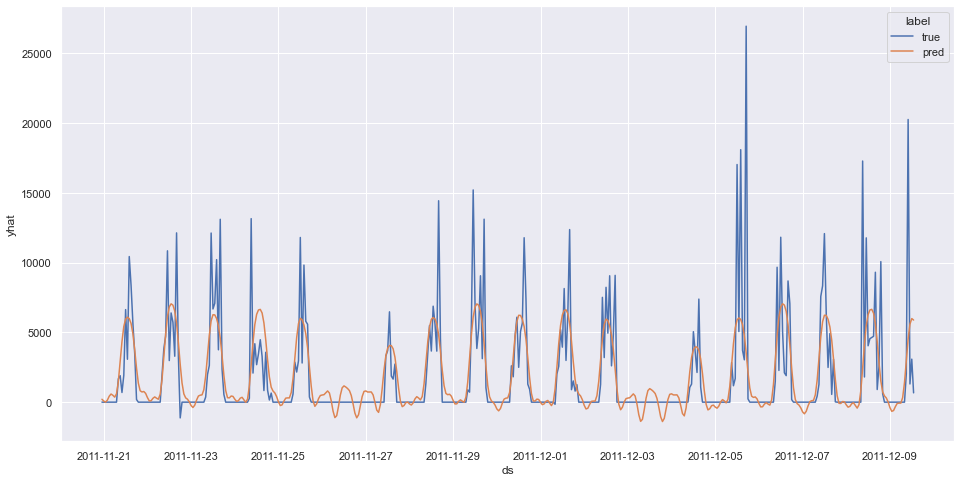

In [36]:
pd.options.mode.chained_assignment = None

test_df.loc[:,'label'] = 'true'
test_df.loc[:,'yhat'] = test_df.loc[:,'y']
preds.loc[:, 'label'] = 'pred'
df_result = pd.concat([test_df[['yhat','label','ds']], preds[['yhat','label','ds']]])

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(y='yhat', x='ds', ax=ax, data=df_result, hue='label', markers = True)

plt.show()